# Importation des librairies

In [1]:
# OS
import sys

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight') 

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN
import seaborn as sns

# SCHIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encodage des variables catégorielles nominales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # encodage des variables catégorielles ordinales
from sklearn.preprocessing import StandardScaler # normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # imputation
from sklearn.impute import KNNImputer 


# SCHIKIT-LEARN: MODELES
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet

# SCHIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import cross_val_score # validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # courbe de validation: visulaisr les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # tester plusieurs hyper_paramètres
from sklearn.model_selection import learning_curve # courbe d'apprentissage: visualisation les scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE
from sklearn.pipeline import make_pipeline

# Chargement des données

In [2]:
import os
Fire_data = pd.read_csv('C:/Users/cleme/Downloads/forestfires.csv')

# Description des données

In [3]:
Fire = Fire_data.copy()

In [4]:
Fire.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
Fire.tail(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [6]:
Fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
print(Fire['area'])

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
5         0.00
6         0.00
7         0.00
8         0.00
9         0.00
10        0.00
11        0.00
12        0.00
13        0.00
14        0.00
15        0.00
16        0.00
17        0.00
18        0.00
19        0.00
20        0.00
21        0.00
22        0.00
23        0.00
24        0.00
25        0.00
26        0.00
27        0.00
28        0.00
29        0.00
30        0.00
31        0.00
32        0.00
33        0.00
34        0.00
35        0.00
36        0.00
37        0.00
38        0.00
39        0.00
40        0.00
41        0.00
42        0.00
43        0.00
44        0.00
45        0.00
46        0.00
47        0.00
48        0.00
49        0.00
50        0.00
51        0.00
52        0.00
53        0.00
54        0.00
55        0.00
56        0.00
57        0.00
58        0.00
59        0.00
60        0.00
61        0.00
62        0.00
63        0.00
64        0.00
65        0.00
66        

In [8]:
print(Fire['day'])

0      fri
1      tue
2      sat
3      fri
4      sun
5      sun
6      mon
7      mon
8      tue
9      sat
10     sat
11     sat
12     fri
13     mon
14     wed
15     fri
16     sat
17     mon
18     wed
19     sat
20     tue
21     mon
22     sun
23     sat
24     sat
25     sun
26     fri
27     mon
28     sat
29     sun
30     fri
31     mon
32     fri
33     sun
34     mon
35     tue
36     tue
37     fri
38     sat
39     tue
40     tue
41     sat
42     tue
43     sat
44     wed
45     wed
46     mon
47     mon
48     mon
49     mon
50     thu
51     sun
52     wed
53     wed
54     thu
55     thu
56     tue
57     sun
58     mon
59     fri
60     sun
61     sun
62     thu
63     sun
64     mon
65     thu
66     fri
67     fri
68     fri
69     fri
70     fri
71     fri
72     fri
73     tue
74     fri
75     thu
76     fri
77     mon
78     fri
79     tue
80     sun
81     sun
82     tue
83     wed
84     thu
85     thu
86     thu
87     thu
88     sun
89     sat
90     sat

# Analyse Exploratoire

In [9]:
dup_Fi = Fire[Fire.duplicated()]
print(dup_Fi)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00


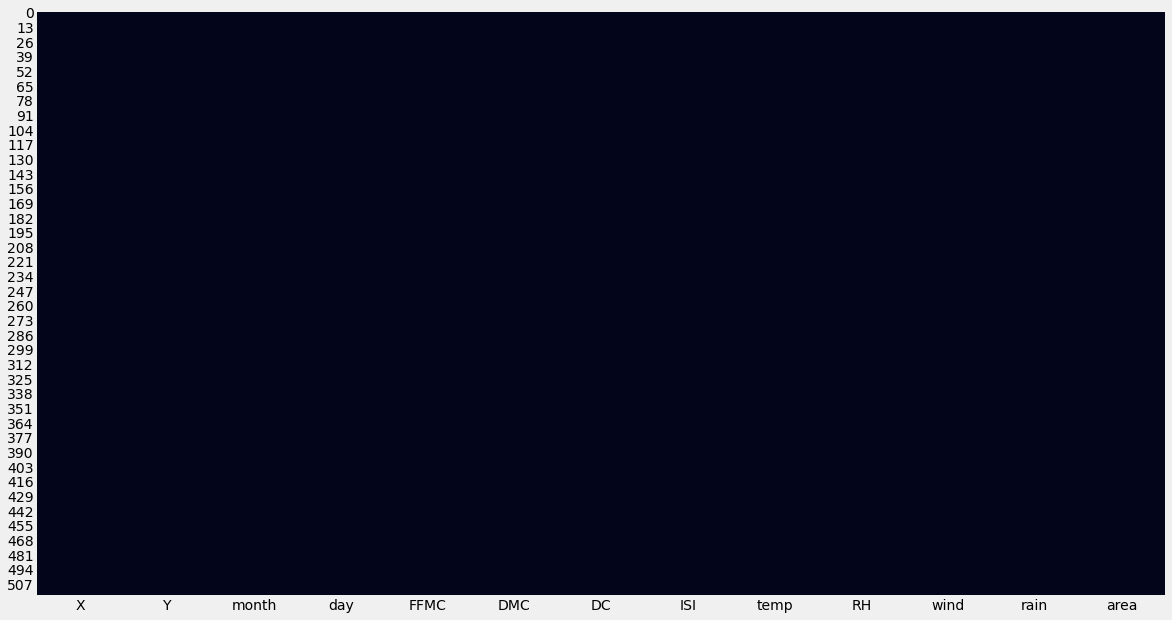

In [10]:
plt.figure(figsize=(18, 10))
sns.heatmap(Fire.isna(), cbar=False)
plt.show()

# Variable cible

In [11]:
Fire["area"].value_counts()

0.00       247
1.94         3
3.71         2
0.90         2
1.95         2
2.14         2
2.18         2
1.56         2
9.96         2
28.66        2
1.46         2
0.68         2
0.43         2
1.64         2
6.43         2
9.27         2
0.52         2
1.75         2
11.06        2
1.63         2
17.20        1
48.55        1
0.95         1
0.77         1
11.19        1
15.64        1
2.64         1
3.52         1
38.48        1
5.39         1
9.77         1
14.29        1
196.48       1
2.57         1
4.61         1
0.33         1
1.23         1
61.13        1
8.24         1
1.69         1
0.24         1
10.73        1
1.47         1
1.09         1
37.02        1
105.66       1
7.21         1
0.55         1
2.55         1
32.07        1
64.10        1
7.80         1
4.40         1
28.74        1
36.85        1
7.30         1
2.93         1
10.02        1
5.44         1
8.16         1
2.51         1
13.05        1
24.59        1
1.29         1
37.71        1
7.36         1
0.61      

In [12]:
len(Fire)

517

In [13]:
Fire["area"].value_counts()[0]/len(Fire)

0.47775628626692457

In [14]:
Fire["area"] = [0 if i == 0 else 1 for i in Fire["area"]]

In [15]:
Fire['area']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [16]:
Fire["area"].value_counts()

1    270
0    247
Name: area, dtype: int64

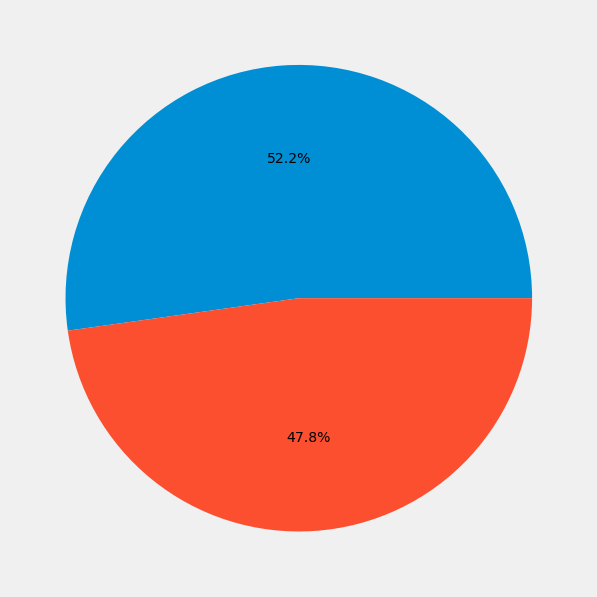

In [17]:
plt.figure(figsize=(18, 10))
plt.pie(Fire["area"].value_counts(), autopct='%1.1f%%')
plt.show()

# Analyse univariée

In [18]:
Fire.dtypes.value_counts()

float64    7
int64      4
object     2
dtype: int64

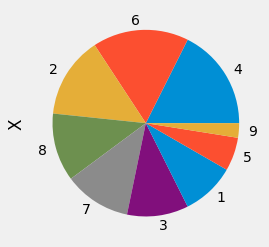

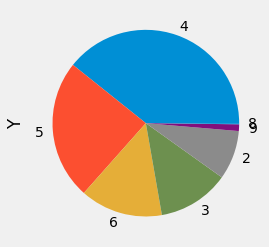

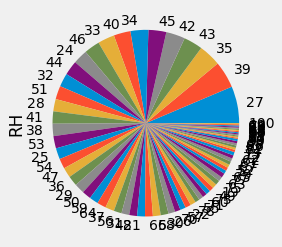

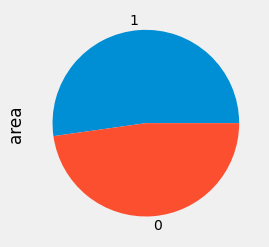

In [19]:
for feature in Fire.select_dtypes('Int64'):
    plt.figure()
    Fire[feature].value_counts().plot.pie()
    plt.show()

# Distibution des variables numériques

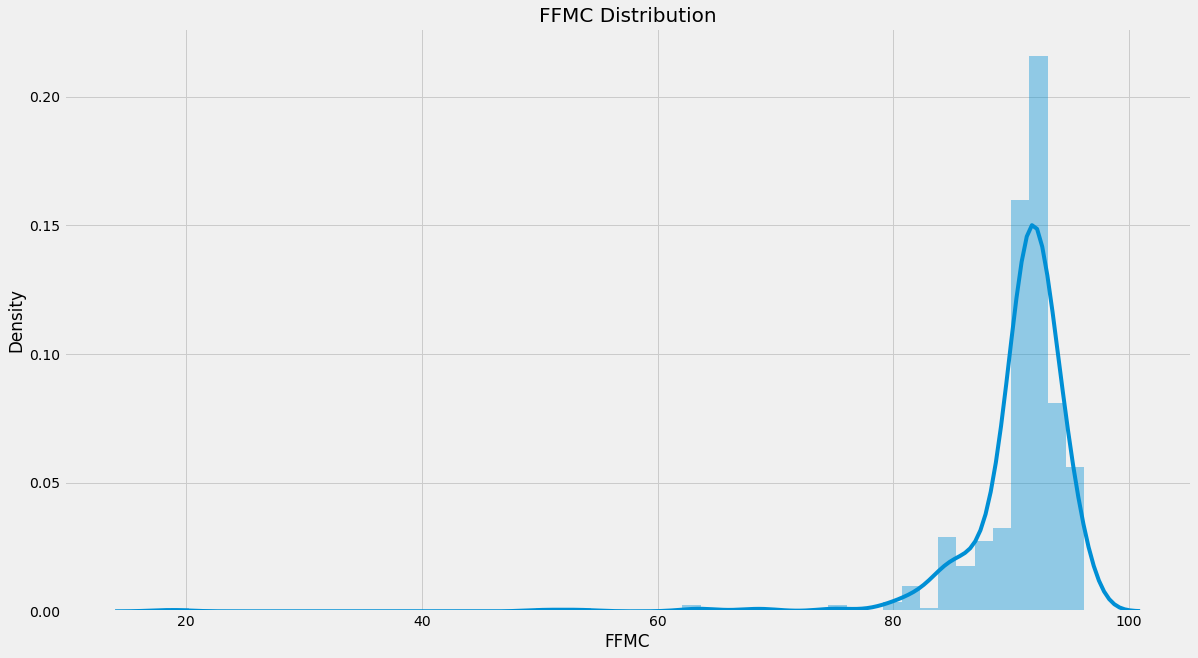

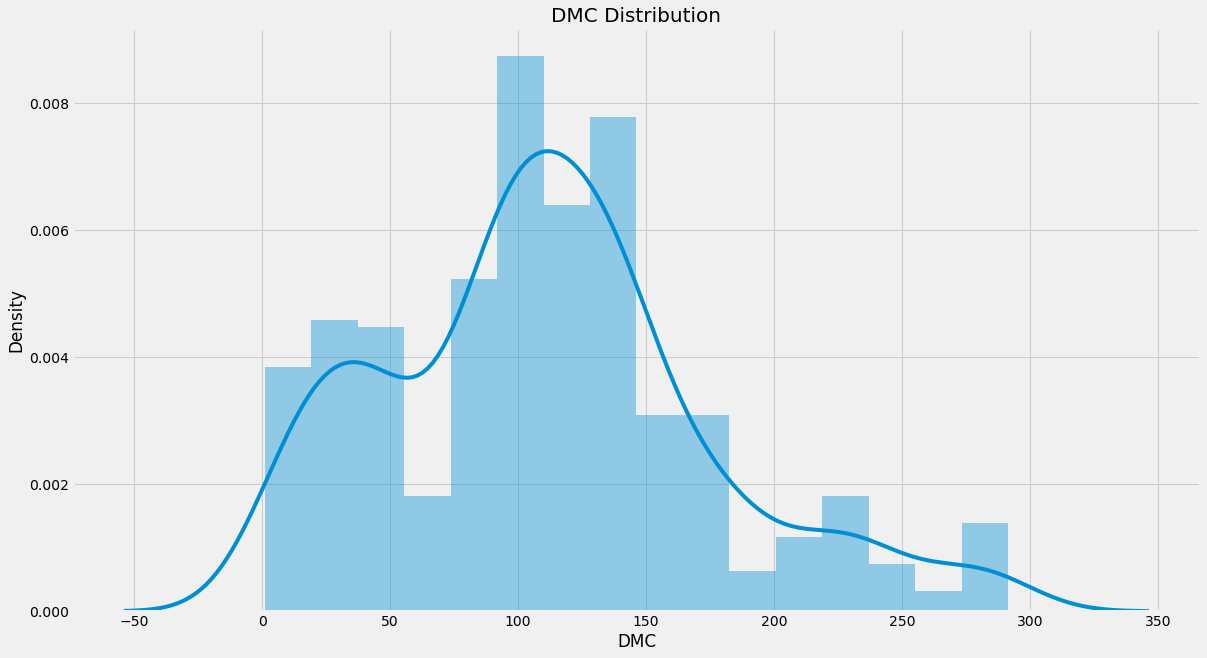

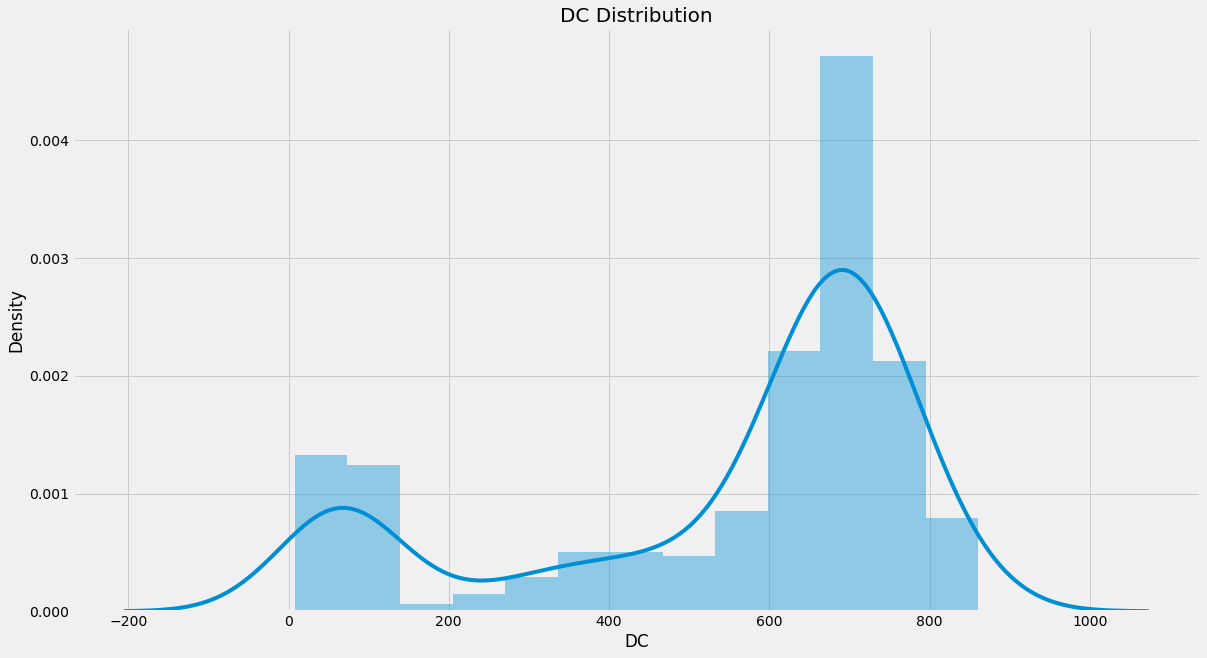

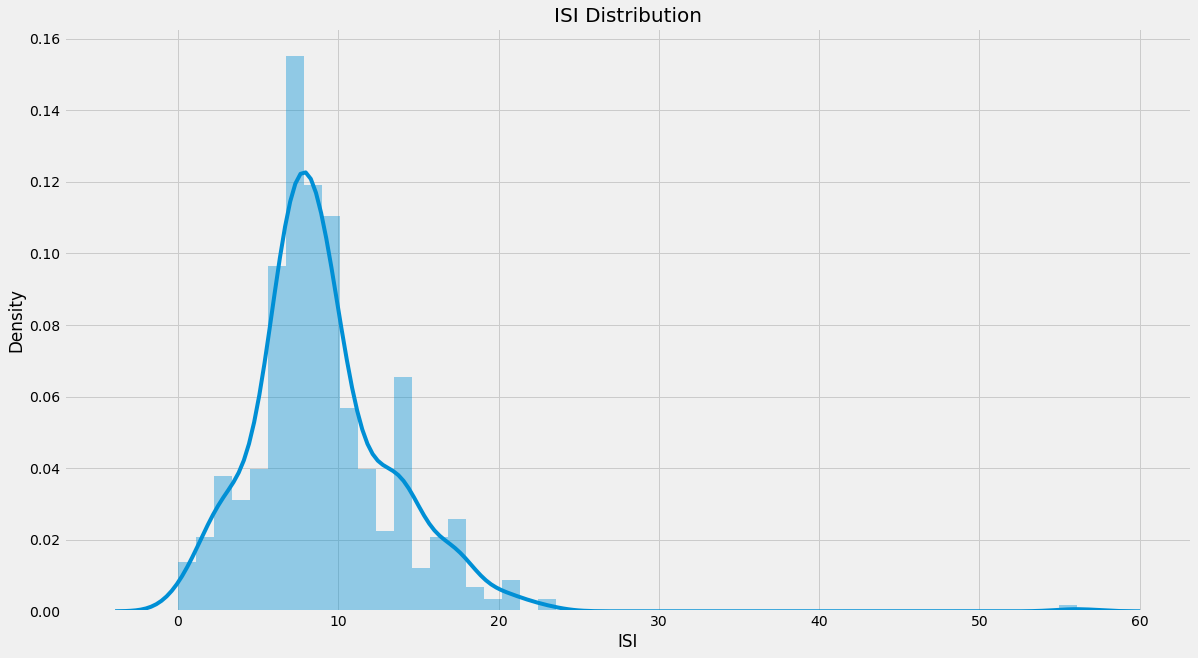

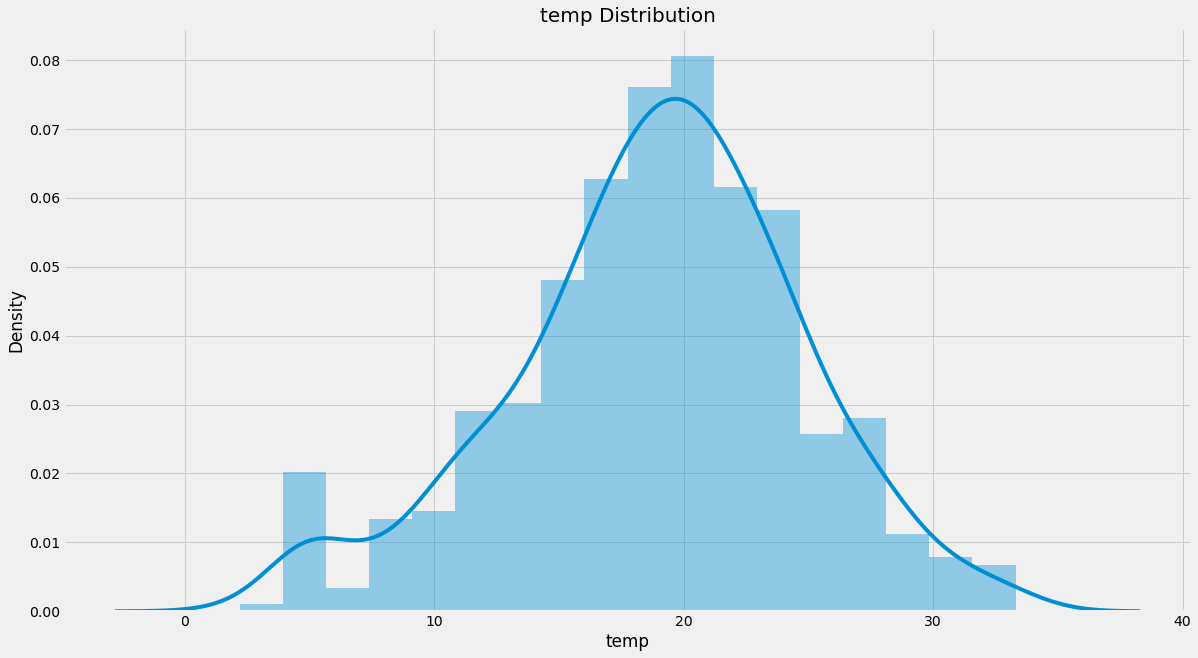

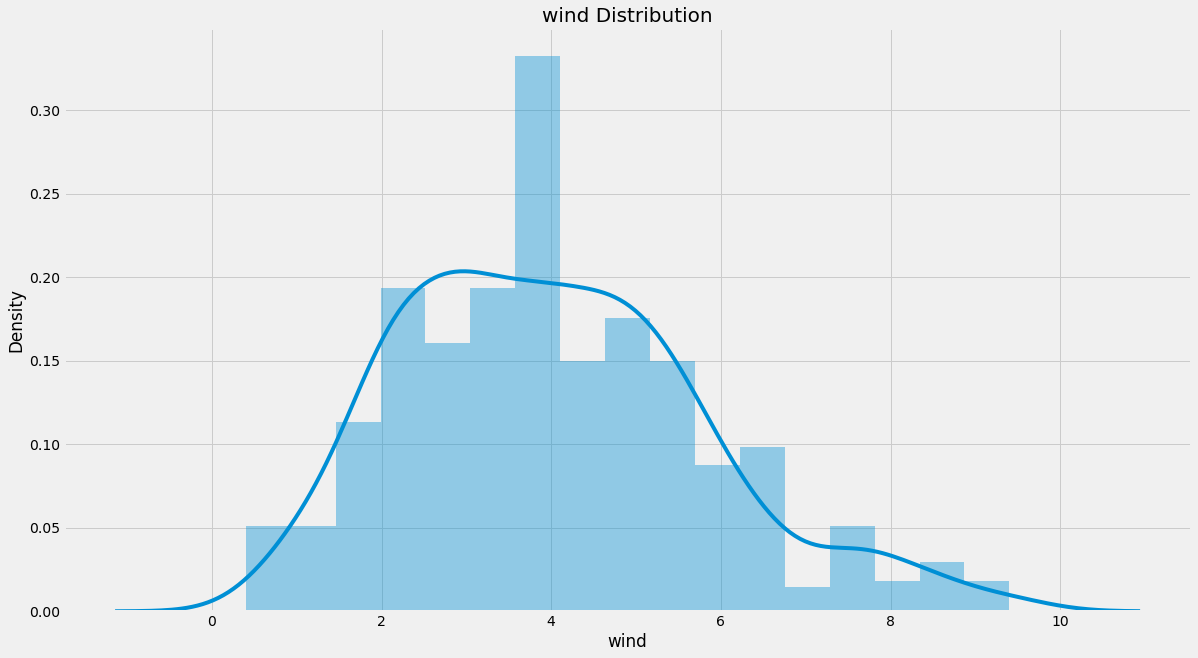

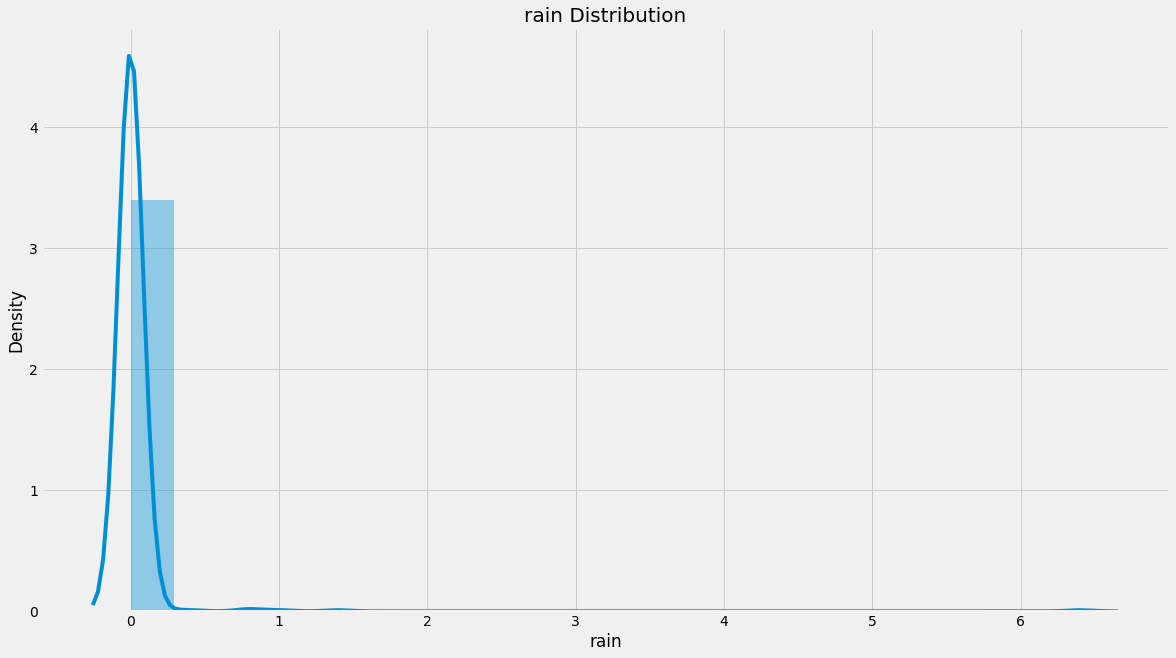

In [20]:
for feature in Fire.select_dtypes('float64'):
    plt.figure(figsize=(18,10))
    sns.distplot(Fire[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

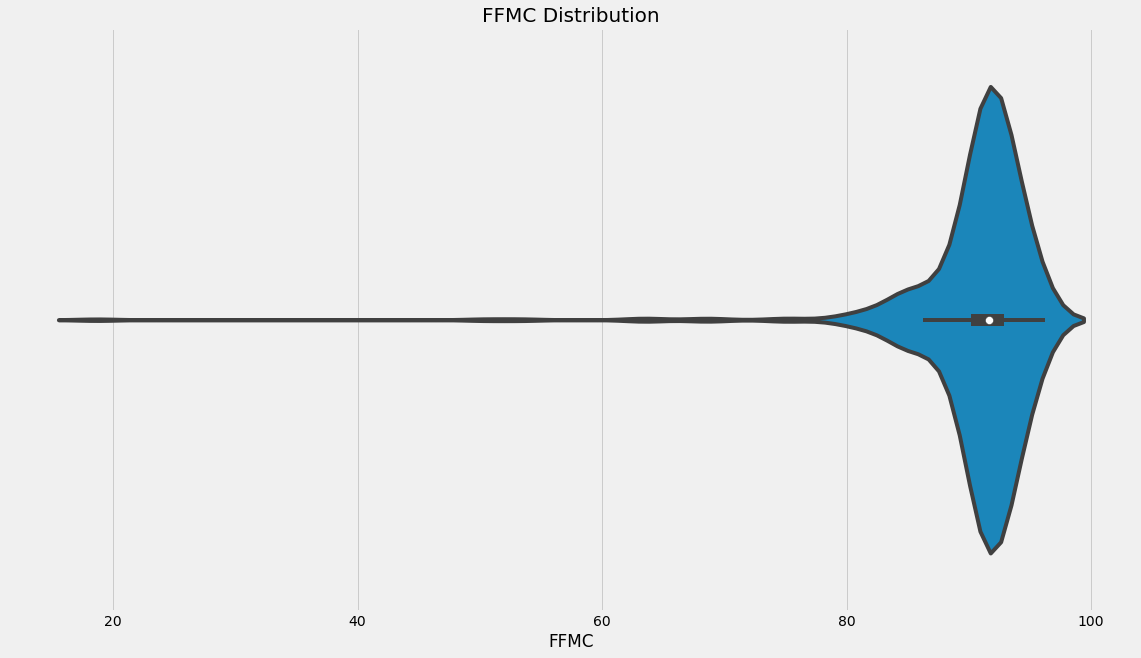

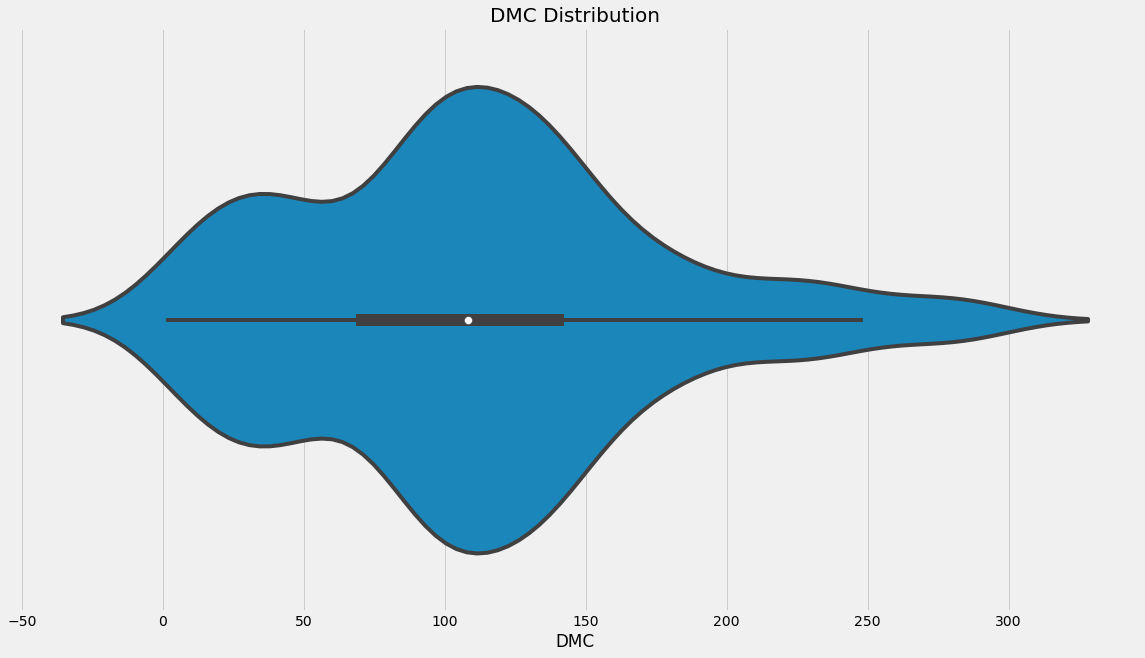

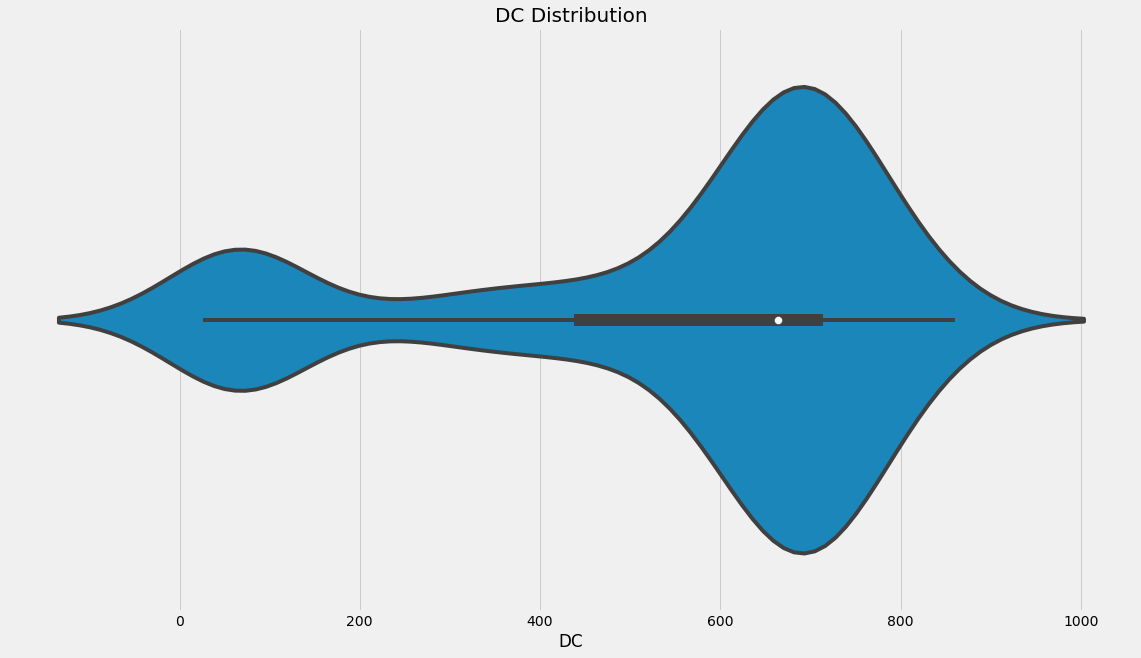

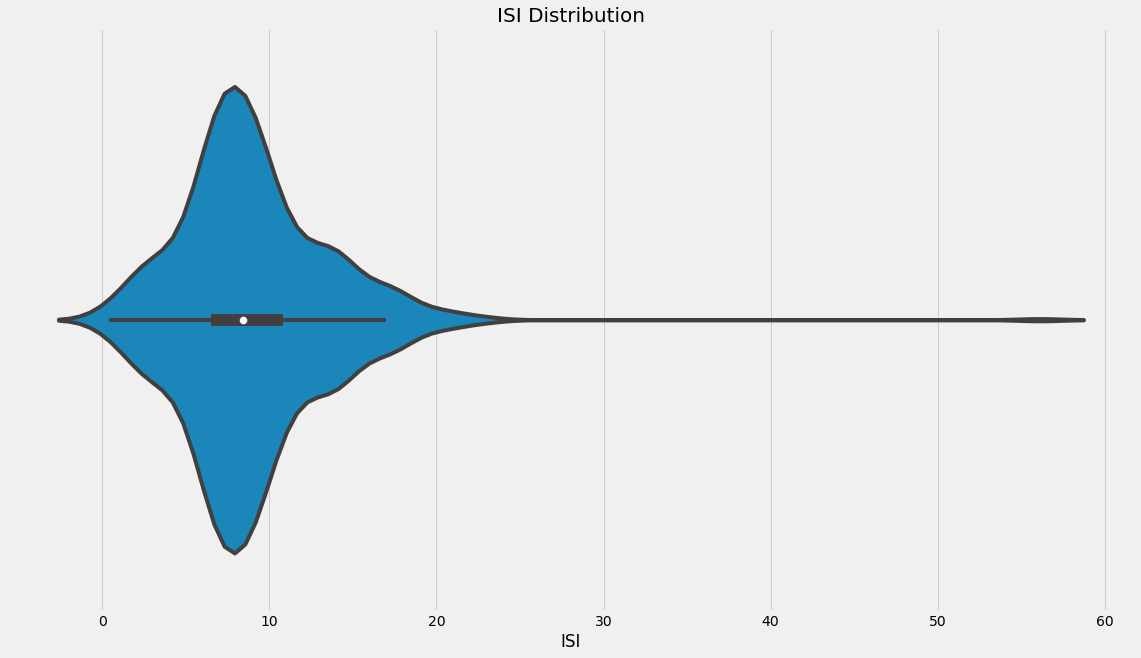

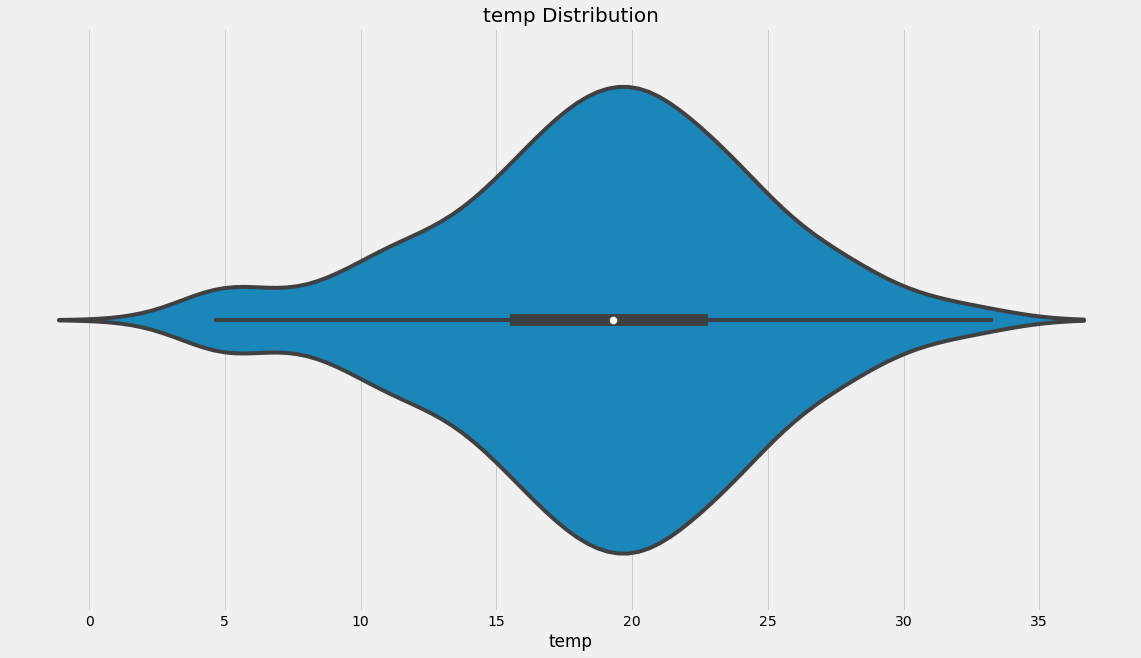

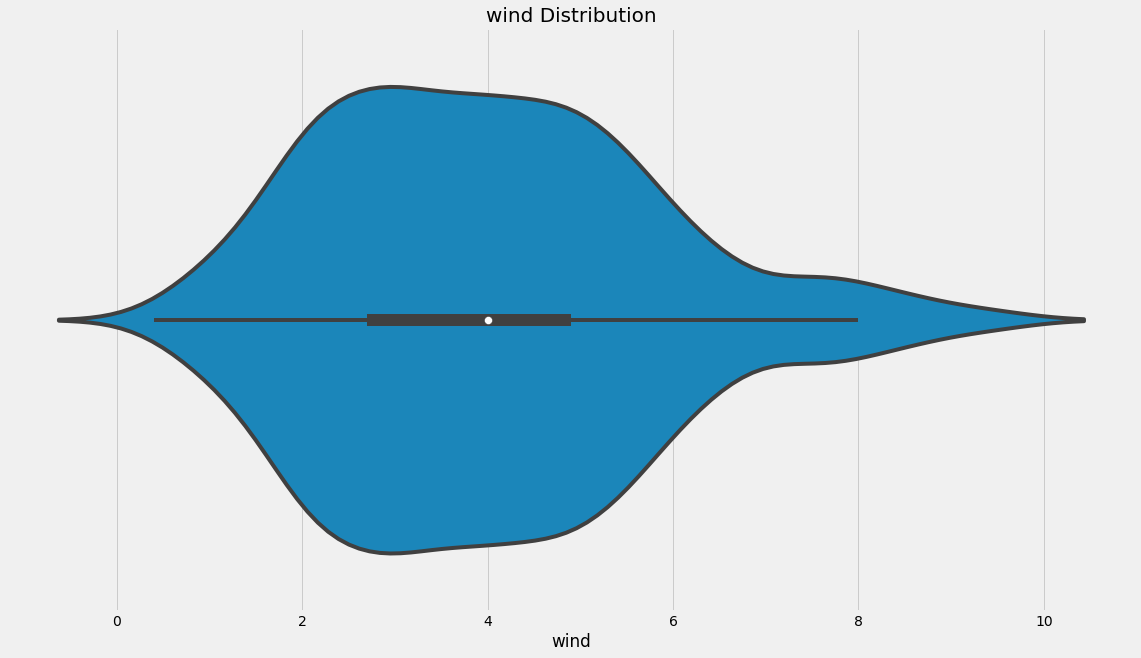

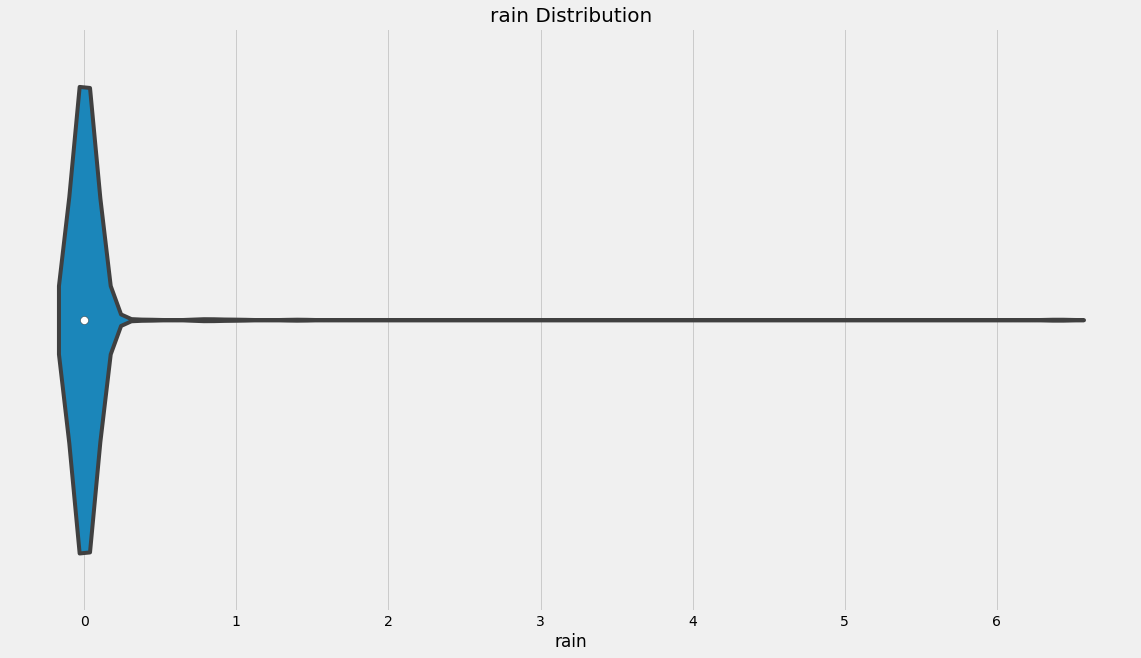

In [21]:
for feature in Fire.select_dtypes('float64'):
    plt.figure(figsize=(18,10))
    sns.violinplot(Fire[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

# Corrélation

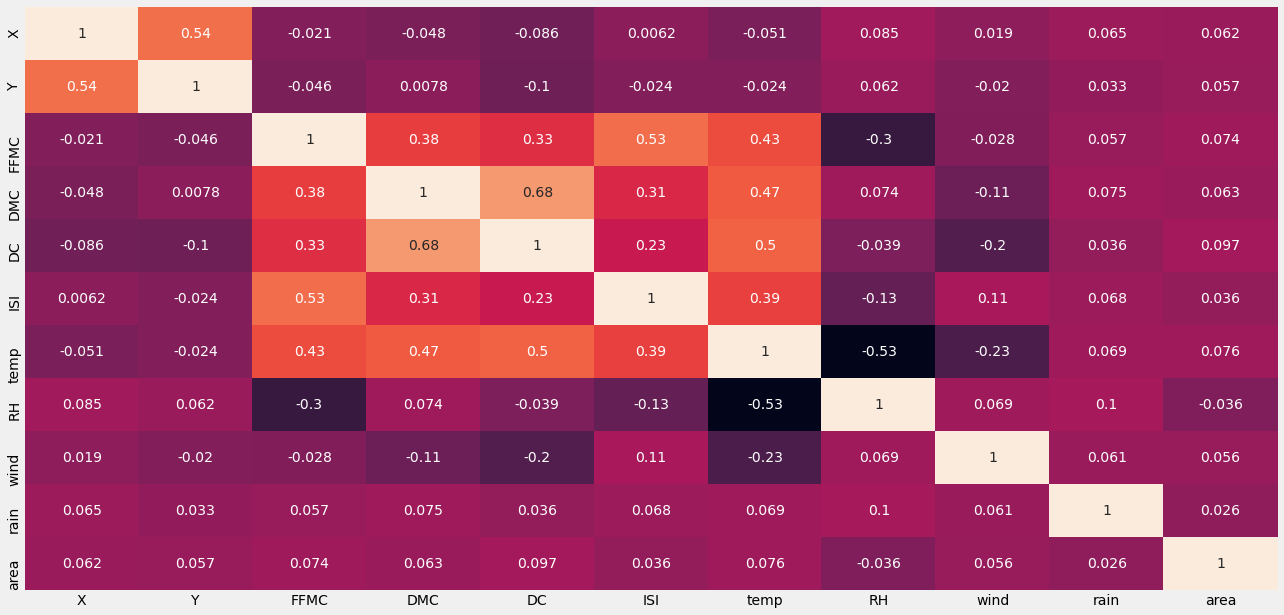

In [22]:
plt.figure(figsize=(20, 10))
sns.heatmap(Fire.corr(), annot=True, cbar=False) #
plt.show()

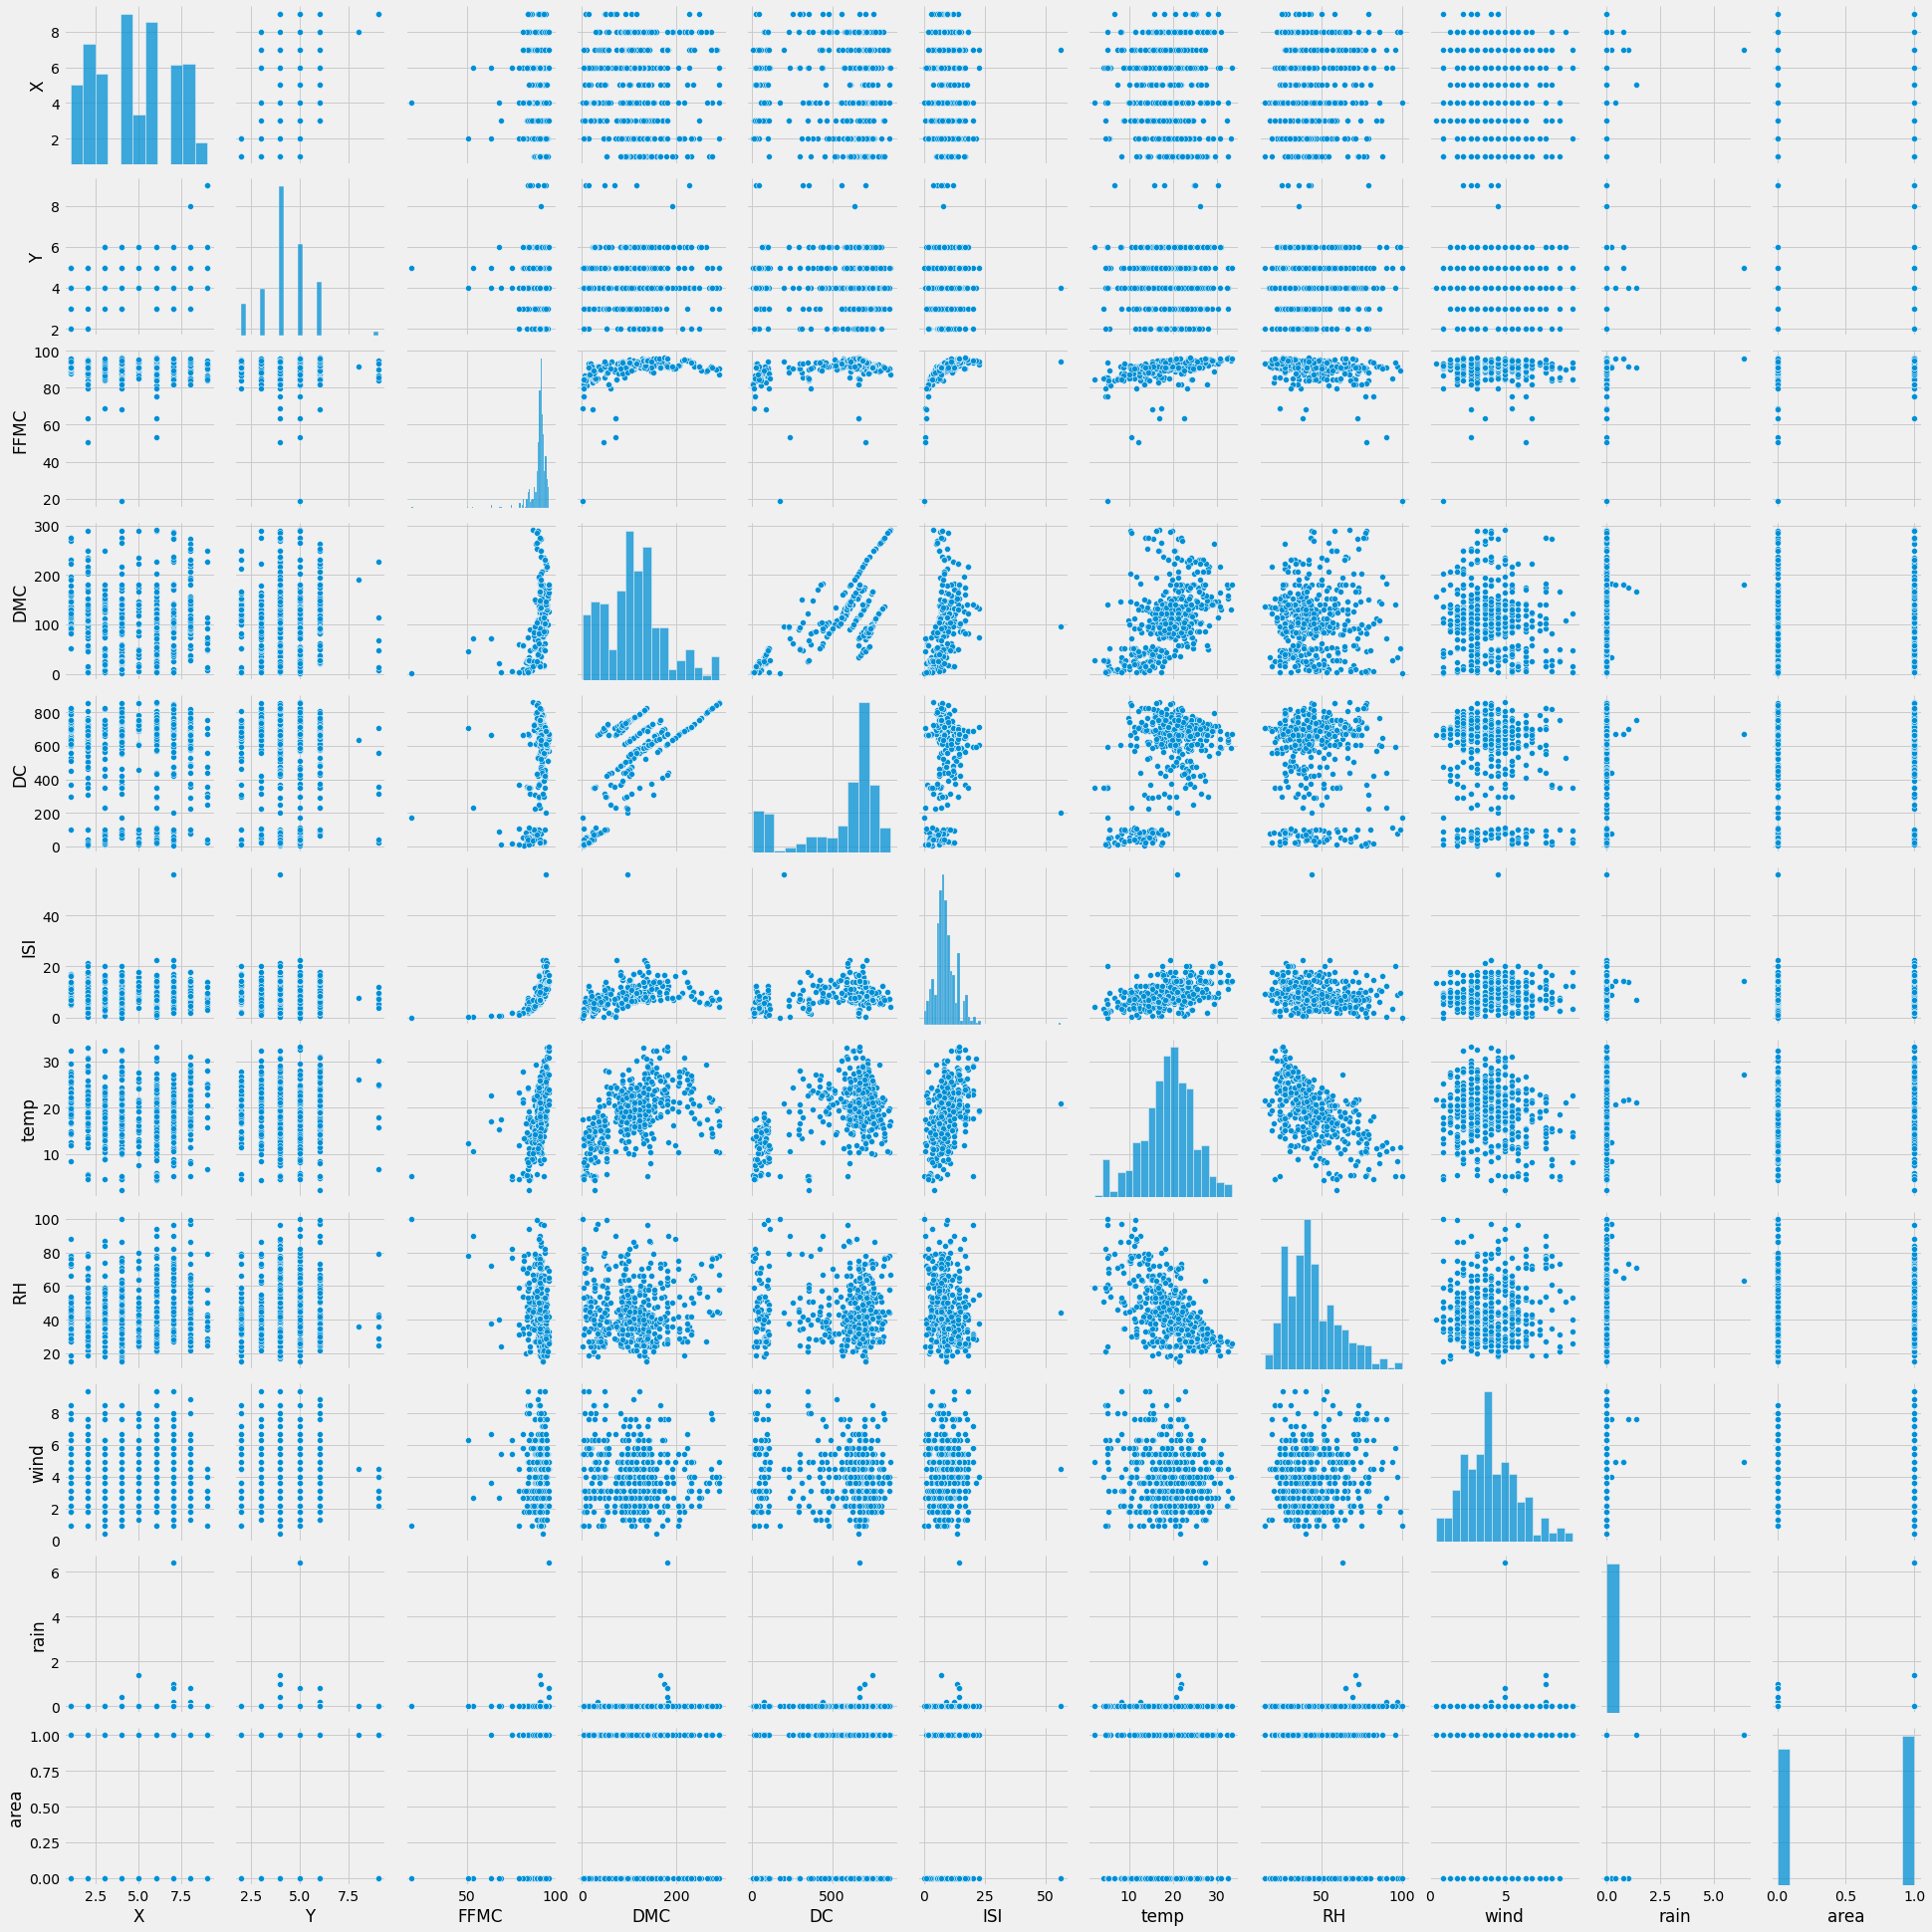

In [23]:
sns.pairplot(Fire)
plt.show()

# Analyse bivariée

Text(0.5, 0, 'temp')

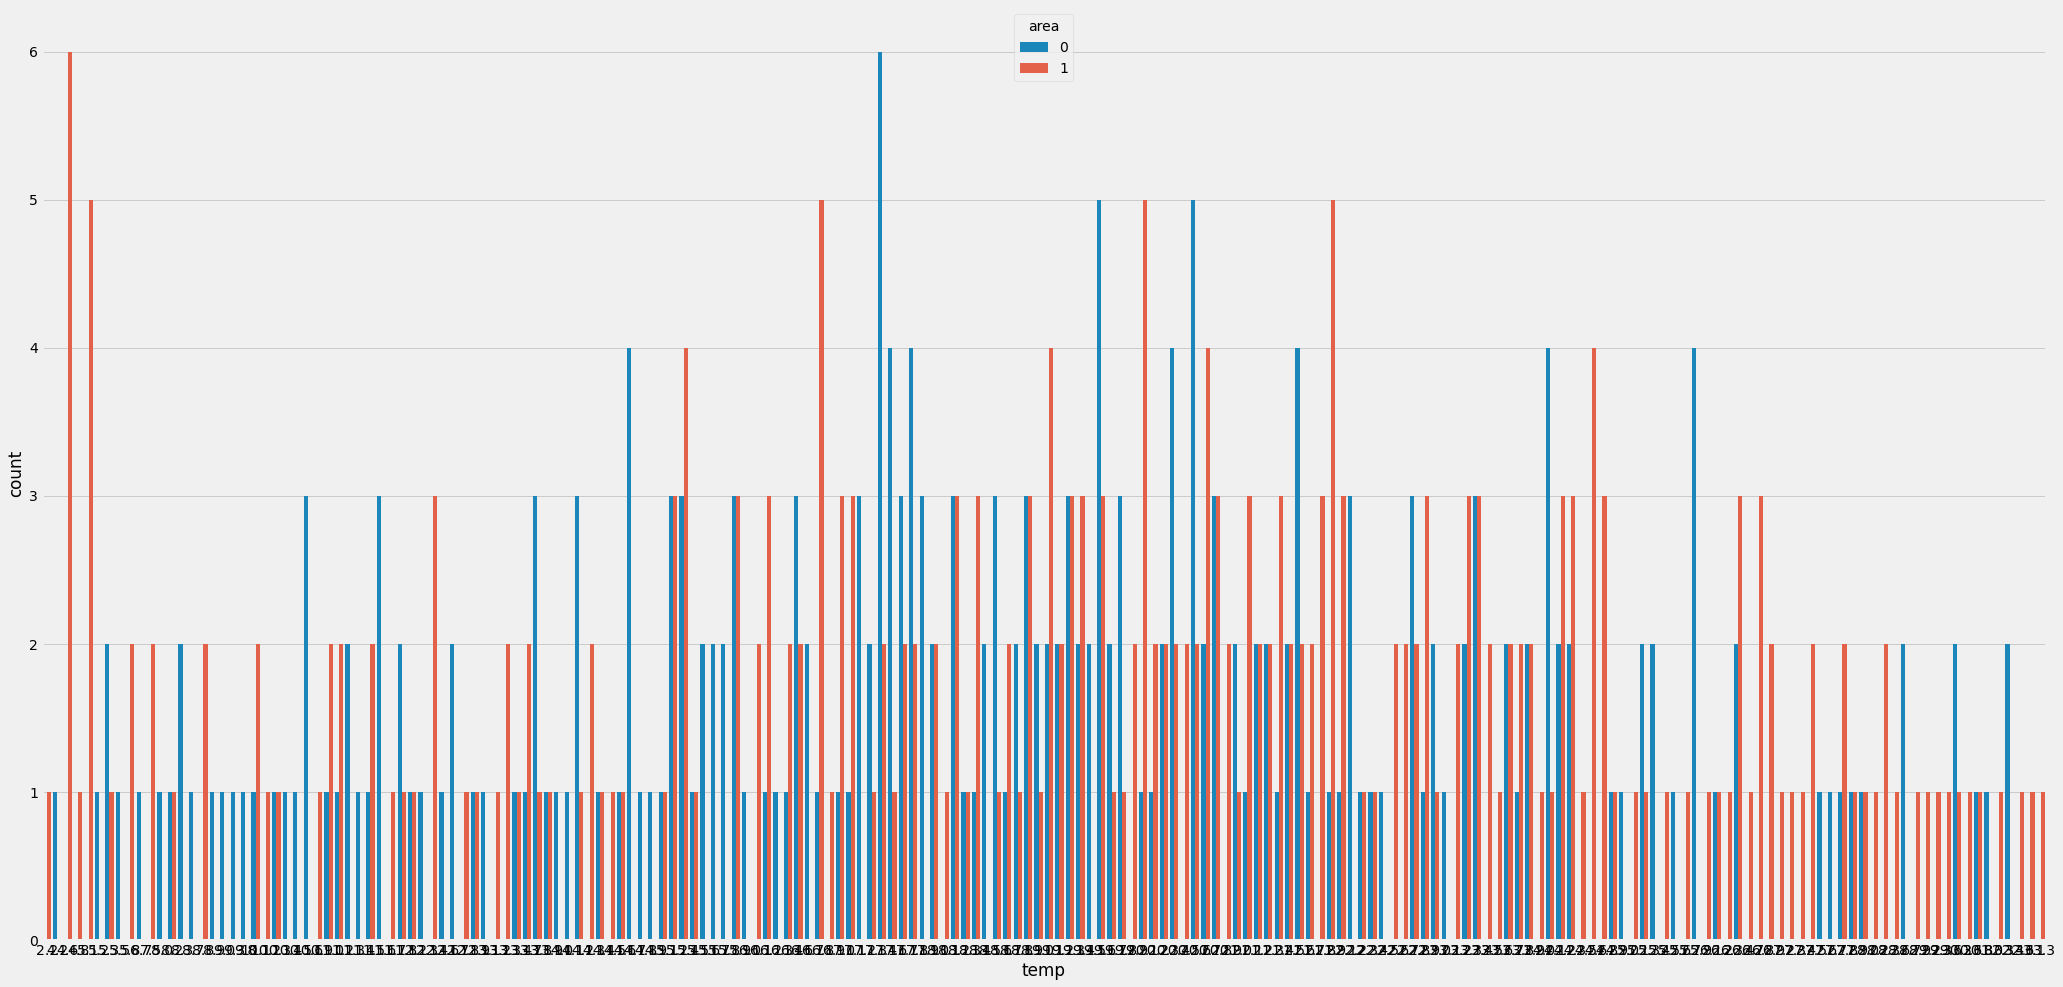

In [24]:
plt.figure(figsize=(32,16))
sns.countplot(x='temp', data=Fire, hue='area')
plt.xlabel("temp")

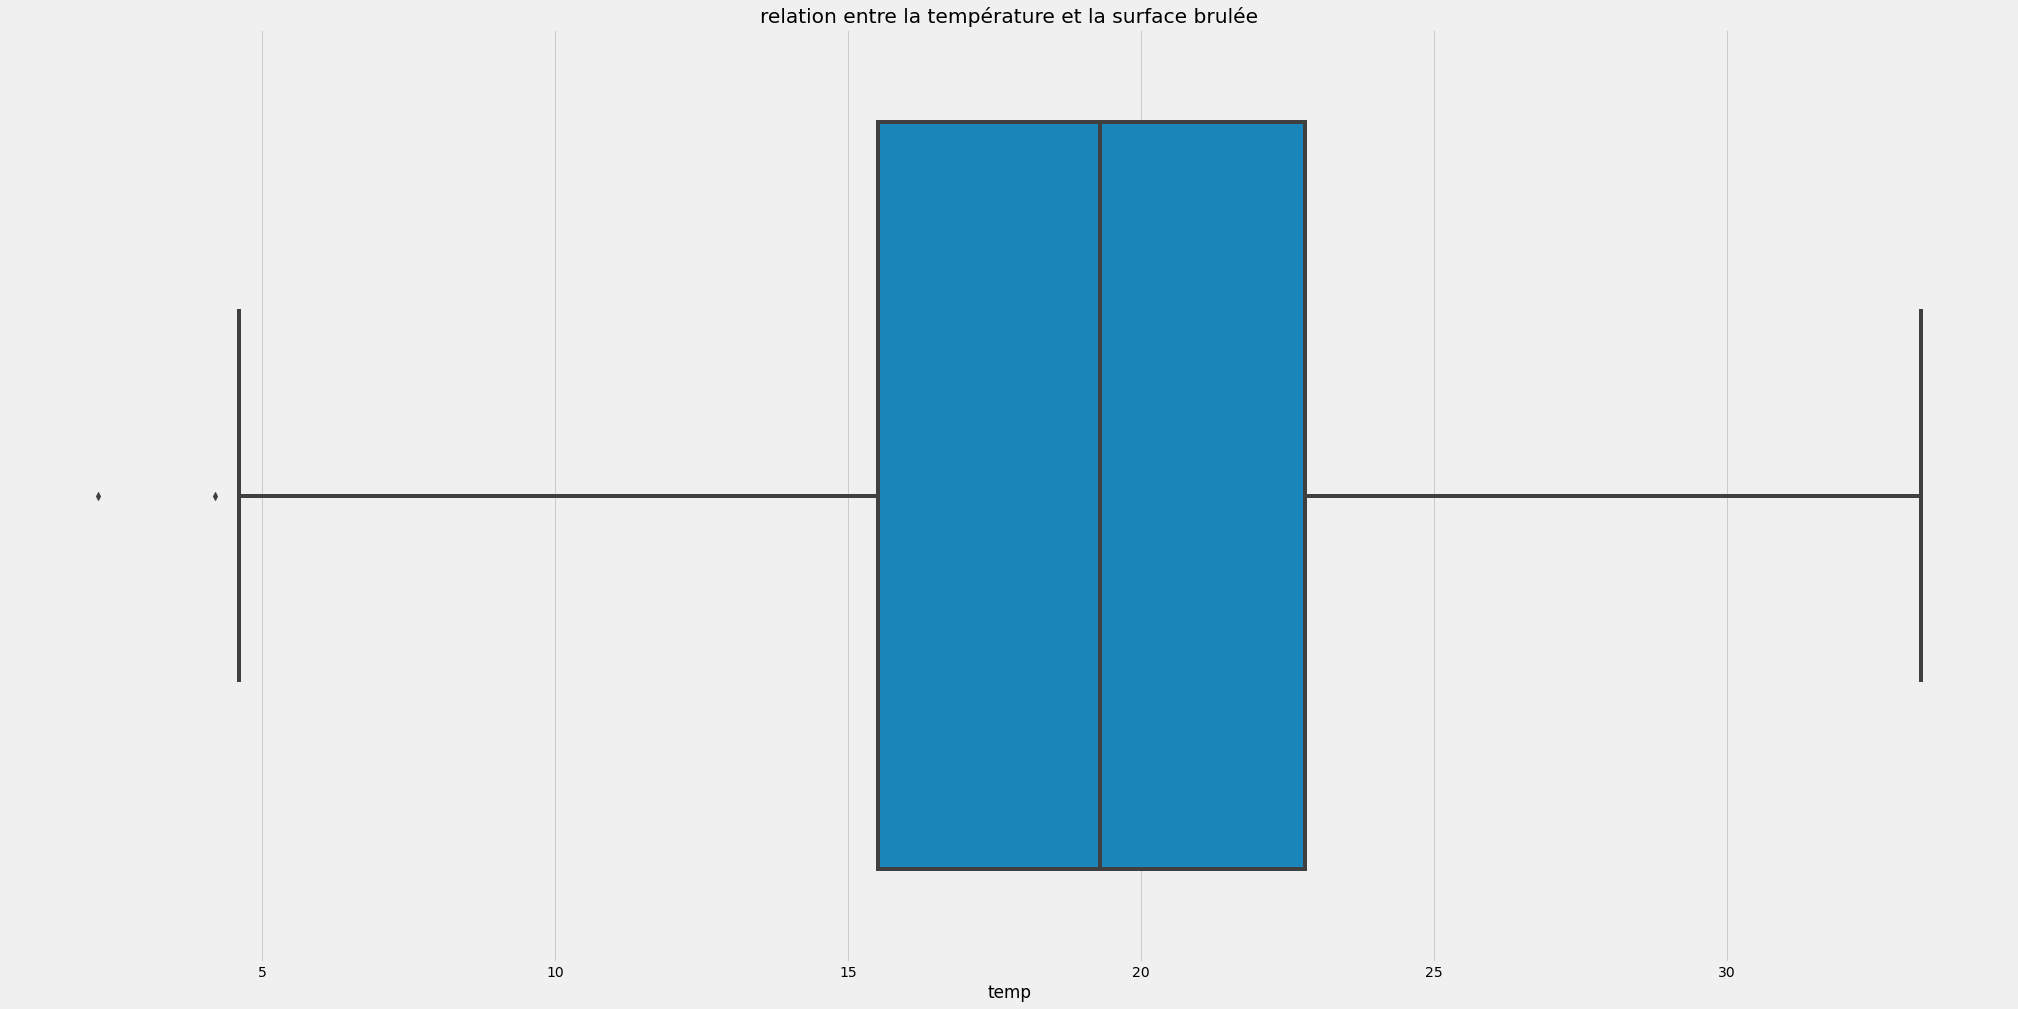

In [25]:
plt.figure(figsize=(32,16))
sns.boxplot(x='temp', data=Fire, hue='area')
plt.title("relation entre la température et la surface brulée")
plt.show()

# Pré-Traitement

In [26]:
T = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6}
Fire['day'] = [T[i] for i in Fire['day']]

In [27]:
T = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}
Fire['month'] = [T[i] for i in Fire['month']]

In [28]:
Fire['month']

0       2
1       9
2       9
3       2
4       2
5       7
6       7
7       7
8       8
9       8
10      8
11      8
12      7
13      8
14      8
15      8
16      2
17      9
18      2
19      3
20      8
21      8
22      5
23      7
24      7
25      7
26      8
27      8
28      8
29      8
30      8
31      8
32      8
33      8
34      8
35      8
36      9
37      9
38      9
39      2
40      6
41      7
42      7
43      8
44      8
45      8
46      8
47      6
48      2
49      2
50      8
51      7
52      7
53      7
54      7
55      8
56      8
57      9
58      1
59      1
60      2
61      2
62      7
63      7
64      7
65      7
66      8
67      8
68      8
69      2
70      2
71      8
72      2
73      7
74      8
75      1
76      1
77      2
78      7
79      7
80      7
81      7
82      7
83      7
84      7
85      8
86      8
87      8
88      8
89      2
90      7
91      2
92      7
93      7
94      7
95      8
96      1
97      2
98      7
99      7


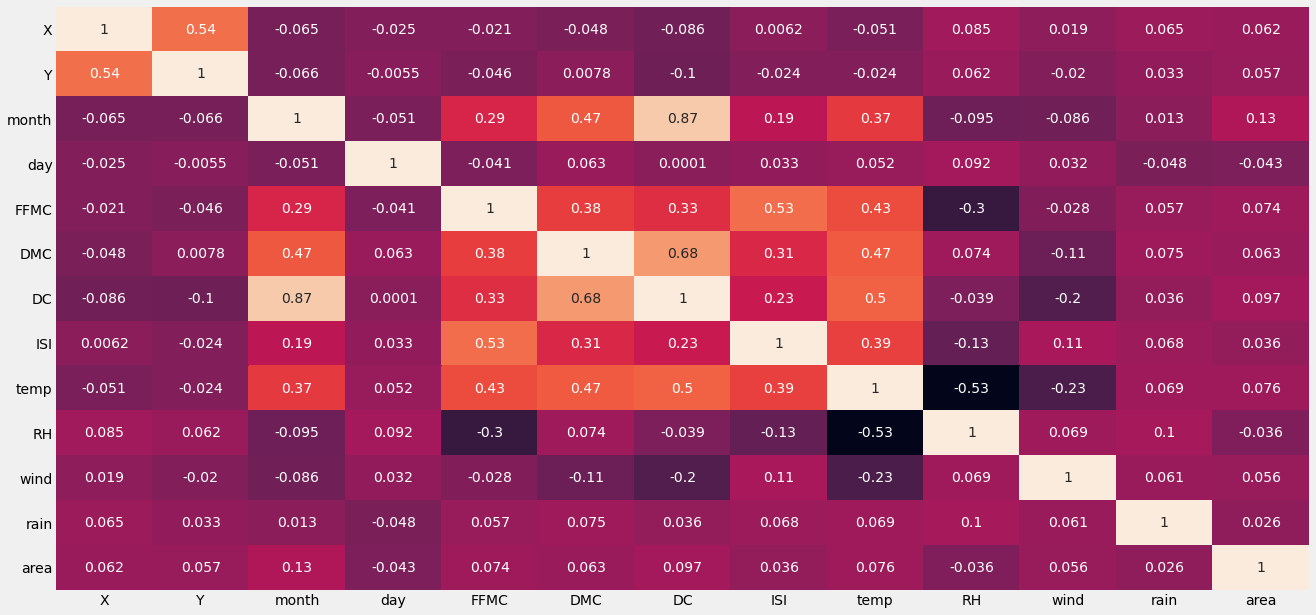

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(Fire.corr(), annot=True, cbar=False) #
plt.show()

In [30]:
del Fire['day']
del Fire['ISI']
del Fire['DMC']
del Fire['FFMC']

# X_train, X_test, y_train, y_test

In [31]:
cat_features = Fire.select_dtypes("int64").columns
cont_features = Fire.select_dtypes(include=['float64']).columns

imput_cont = SimpleImputer(missing_values=np.nan, strategy='mean')
imput_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for feature in cont_features :
    Fire[feature] = imput_cont.fit_transform(Fire[feature].values.reshape(-1,1)).ravel()
for feature in cat_features :
    Fire[feature] = imput_cat.fit_transform(Fire[feature].values.reshape(-1,1)).ravel()

In [32]:
X = Fire.drop('area', axis=1)
y = Fire['area']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [34]:
len(y_train), len(y_test)

(413, 104)

In [35]:
(y_train==1).sum(), (y_train==0).sum(), (y_train==1).sum() / (y_train==0).sum()

(216, 197, 1.0964467005076142)

In [36]:
print(y_train)

41     0
303    0
141    1
125    0
228    1
192    1
466    1
217    1
154    1
404    1
365    1
457    1
288    0
345    1
346    1
407    0
190    1
69     0
454    0
498    1
95     0
379    0
370    1
422    1
293    1
337    1
325    0
113    0
180    1
10     0
147    1
153    1
411    1
342    0
44     0
152    1
481    0
296    1
183    1
408    1
34     0
295    0
91     0
384    1
233    1
51     0
505    1
465    1
275    1
406    1
202    1
357    0
3      0
298    0
340    1
344    1
200    1
86     0
366    1
187    1
286    0
175    1
60     0
43     0
297    0
503    1
94     0
7      0
419    1
28     0
146    1
161    1
22     0
341    0
409    0
266    1
116    0
97     0
368    1
105    0
123    0
458    1
209    1
54     0
201    1
65     0
210    1
324    1
219    1
235    1
302    0
320    1
358    0
231    1
371    0
73     0
319    1
513    1
367    0
495    0
317    1
412    1
478    1
316    0
476    1
263    1
375    1
26     0
396    1
240    0
170    1
3

In [37]:
X_train.head()

,X,Y,month,DC,temp,RH,wind,rain
41,4,4,7,624.2,18.4,42,6.7,0.0
303,3,6,5,232.1,19.2,38,4.5,0.0
141,1,2,7,513.3,23.3,31,4.5,0.0
125,3,4,9,691.8,20.6,24,5.4,0.0
228,4,6,8,728.6,28.3,26,3.1,0.0


In [38]:
scale_minmax = MinMaxScaler()
scale_robust = RobustScaler()
# normaliser les données d'entrainement
for feature in cont_features:
    X_train[feature] = scale_minmax.fit_transform(X_train[feature].values.reshape(-1,1)).ravel()

In [39]:
# normaliser les donnéees de test
for feature in cont_features:
    X_test[feature] = scale_minmax.fit_transform(X_test[feature].values.reshape(-1,1)).ravel()

In [40]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1206)

# Do the process
X_train_up, y_train_up = smt.fit_resample(X_train, y_train)

# Modélisation prédictive

In [41]:
# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression

# models
logreg = LogisticRegression(penalty='none')
logregRidge = LogisticRegression(penalty='l2')
logregLasso = LogisticRegression(penalty='l1', solver='saga')
logregElasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.9)

In [42]:
dict_models = {"Reression logistique": logreg,
              "Regression logistique + Ridge": logregRidge,
              "Regression logistique + Lasso": logregLasso,
              "Regression logistique + Elastic Net": logregElasticNet
              }

# Prédiction et Evaluation

Régression logistique

Matrice de confusion:
[[23 27]
 [25 29]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.48      0.46      0.47        50
           1       0.52      0.54      0.53        54

    accuracy                           0.50       104
   macro avg       0.50      0.50      0.50       104
weighted avg       0.50      0.50      0.50       104
 

Exactitude: 50.000000 



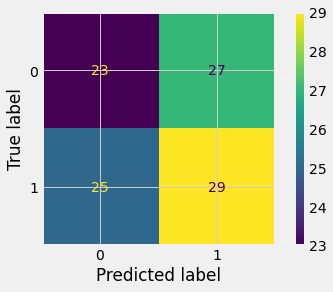

In [43]:
## régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

Régression logistique + Ridge

Matrice de confusion:
[[22 28]
 [26 28]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.46      0.44      0.45        50
           1       0.50      0.52      0.51        54

    accuracy                           0.48       104
   macro avg       0.48      0.48      0.48       104
weighted avg       0.48      0.48      0.48       104
 

Exactitude: 48.076923 



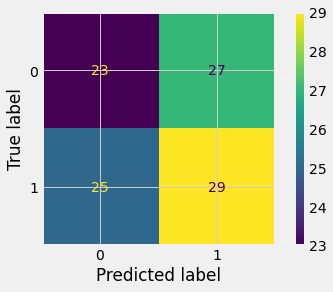

In [44]:
## régression logistique + ridge
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)

print('='*30)
print('Régression logistique + Ridge')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

Régression logistique + Lasso

Matrice de confusion:
[[23 27]
 [23 31]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        50
           1       0.53      0.57      0.55        54

    accuracy                           0.52       104
   macro avg       0.52      0.52      0.52       104
weighted avg       0.52      0.52      0.52       104
 

Exactitude: 51.923077 



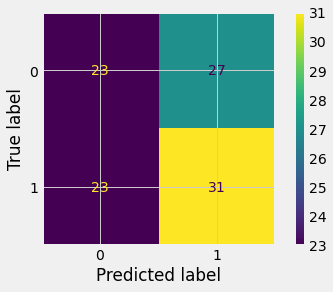

In [45]:
## régression logistique + Lasso
logregLasso.fit(X_train_up, y_train_up)
y_pred = logregLasso.predict(X_test)

print('='*30)
print('Régression logistique + Lasso')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logregLasso, X_test, y_test)
plt.show()

Régression logistique + Elastic Net

Matrice de confusion:
[[23 27]
 [23 31]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        50
           1       0.53      0.57      0.55        54

    accuracy                           0.52       104
   macro avg       0.52      0.52      0.52       104
weighted avg       0.52      0.52      0.52       104
 

Exactitude: 51.923077 



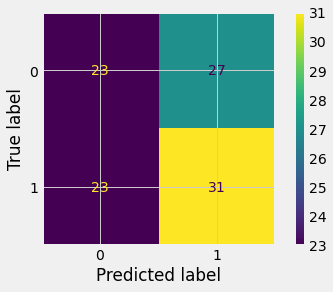

In [46]:
## régression logistique + elasticnet
logregElasticNet.fit(X_train_up, y_train_up)
y_pred = logregElasticNet.predict(X_test)

print('='*35)
print('Régression logistique + Elastic Net')
print('='*35, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logregElasticNet, X_test, y_test)
plt.show()

# Réglages des hyper paramètres

In [47]:
## régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensibilite = TP / float(TP+FN)
specificite = TN / float(TN+FP)

In [48]:
print('Exactitude = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Erreur de classification= 1- Exactitude= ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensibilité (True Positive Rate) = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificité (True Negative Rate) = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Précision (Positive Predictive value) = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n')

Exactitude = TP+TN/(TP+TN+FP+FN) =  0.5 
 Erreur de classification= 1- Exactitude=  0.5 
 Sensibilité (True Positive Rate) = TP/(TP+FN) =  0.5370370370370371 
 Specificité (True Negative Rate) = TN/(TN+FP) =  0.46 
 Précision (Positive Predictive value) = TP/(TP+FP) =  0.5178571428571429 
 Negative predictive Value = TN/(TN+FN) =  0.4791666666666667 



In [49]:
y_pred_prob = logreg.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob de mort (0)','Prob de survie (1)'])
y_pred_prob_df.head()

,Prob de mort (0),Prob de survie (1)
0,0.456167,0.543833
1,0.569089,0.430911
2,0.570758,0.429242
3,0.442188,0.557812
4,0.365667,0.634333


In [64]:
param_grid = {'C': [1, 10, 100, 1000], 'max_iter': [97]}
grid = GridSearchCV(logreg, param_grid, verbose=10, n_jobs=1, return_train_score=True)
# attention n_jobs=-1 va utiliser tous les CPUs
grid.fit(X_train_up, y_train_up)

TypeError: 'float' object cannot be interpreted as an integer

In [58]:
grid.best_params_

{'C': 1, 'max_iter': 97}

In [59]:
grid_logreg = grid.best_estimator_

In [60]:
predictions = grid_logreg.fit(X_train, y_train)

In [61]:
grid_logreg.score(X_train, y_train)

0.5641646489104116

In [62]:
grid_logreg.score(X_test, y_test)

0.46153846153846156

Régression logistique

Matrice de confusion:
[[16 34]
 [22 32]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.42      0.32      0.36        50
           1       0.48      0.59      0.53        54

    accuracy                           0.46       104
   macro avg       0.45      0.46      0.45       104
weighted avg       0.45      0.46      0.45       104
 

Exactitude: 46.153846 



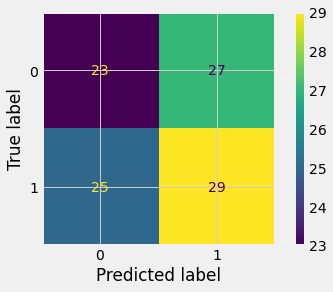

In [63]:
# performance de régression logistique avec GridSearchCV
y_pred = grid_logreg .predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()